# Architecture Diagram

In [ ]:
!pip install diagrams

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.7/824.7 kB 33.5 MB/s eta 0:00:00


In [ ]:
!pwd

/content


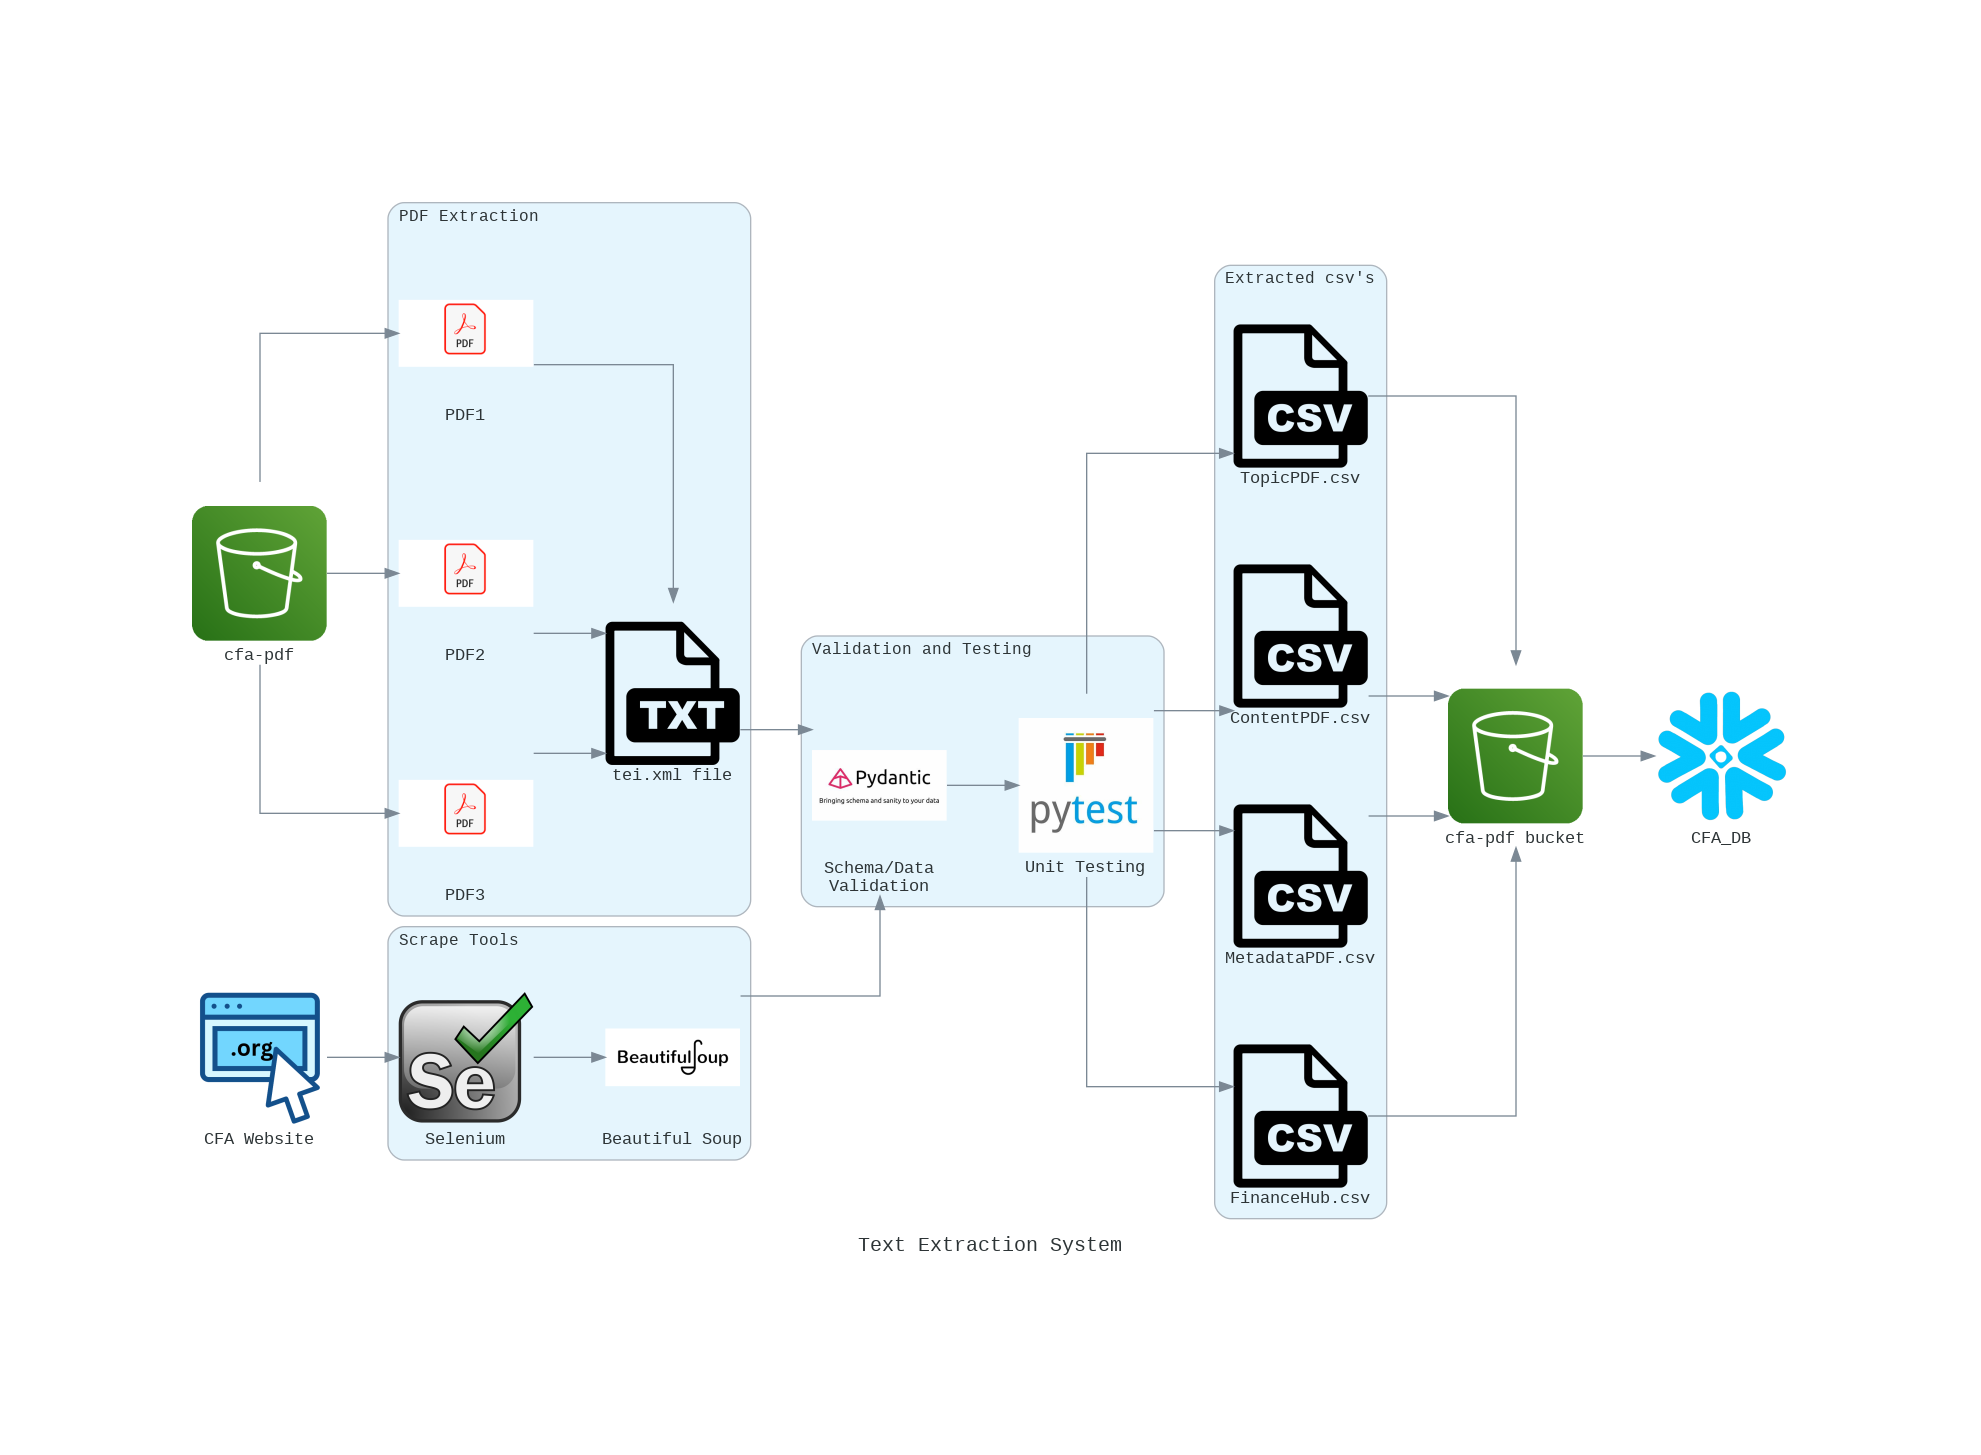

In [ ]:
from diagrams import Cluster, Diagram
from diagrams.aws.compute import ECS
from diagrams.programming.language import Python
from diagrams.aws.storage import S3
from diagrams.saas.analytics import Snowflake
from diagrams.custom import Custom

with Diagram("Text Extraction System", show=False, direction="LR", filename="architecture") as diag:


    with Cluster("Scrape Tools"):
        web_scraping = Custom("Beautiful Soup", "sample_data/soup.png")
        web_scraping_selenium = Custom("Selenium", "sample_data/selenium.png")
        web = web_scraping_selenium >> web_scraping


    s3_local = S3("cfa-pdf")
    # grobid = Custom("GROBID", "sample_data/API.png")
    with Cluster("Validation and Testing"):
      pydantic = Custom("Schema/Data\nValidation", "sample_data/pydantic.jpeg")
      pytest = Custom("Unit Testing", "sample_data/pytest.jpeg")
    # with Cluster("Web Scraping"):
    cfa = Custom("CFA Website", "sample_data/2.png")
    with Cluster("Extracted csv's"):
      topiccsv = Custom("TopicPDF.csv", "sample_data/csv-file-icon.png")
      contentcsv = Custom("ContentPDF.csv", "sample_data/csv-file-icon.png")
      metadatacsv = Custom("MetadataPDF.csv", "sample_data/csv-file-icon.png")
      urlcsv = Custom("FinanceHub.csv", "sample_data/csv-file-icon.png")
    # web_scraping = Custom("Scraping", "sample_data/soup.png")
    # urlcsv = Custom("FinanceHub.csv", "sample_data/csv-file-icon.png")
    # topiccsv = Custom("TopicPDF.csv", "sample_data/csv-file-icon.png")
    # contentcsv = Custom("ContentPDF.csv", "sample_data/csv-file-icon.png")
    # metadatacsv = Custom("MetadataPDF.csv", "sample_data/csv-file-icon.png")
    cfa >> web_scraping_selenium
    web_scraping >> pydantic
    pydantic >> pytest
    pytest >> urlcsv



    with Cluster("PDF Extraction"):
        pdf1 = Custom("PDF1", "sample_data/pypdf.png")
        pdf2 = Custom("PDF2", "sample_data/pypdf.png")
        pdf3 = Custom("PDF3", "sample_data/pypdf.png")
        grobid_tei_xml = Custom("tei.xml file", "sample_data/txt-file-icon.png")
        s3_local >> pdf1
        s3_local >> pdf2
        s3_local >> pdf3
        pdf1 >> grobid_tei_xml
        pdf2 >> grobid_tei_xml
        pdf3 >> grobid_tei_xml
        grobid_tei_xml >> pydantic
        # pydantic >> pytest
        pytest >> topiccsv
        pytest >> metadatacsv
        pytest >> contentcsv

    s3_cfa = S3("cfa-pdf bucket")
    # metadata = Custom("Metadata", "sample_data/brackets-coding-icon.png")
    snowflake = Snowflake("CFA_DB")

    urlcsv >> s3_cfa
    topiccsv >> s3_cfa
    metadatacsv >> s3_cfa
    contentcsv >> s3_cfa

    s3_cfa >> snowflake

diag

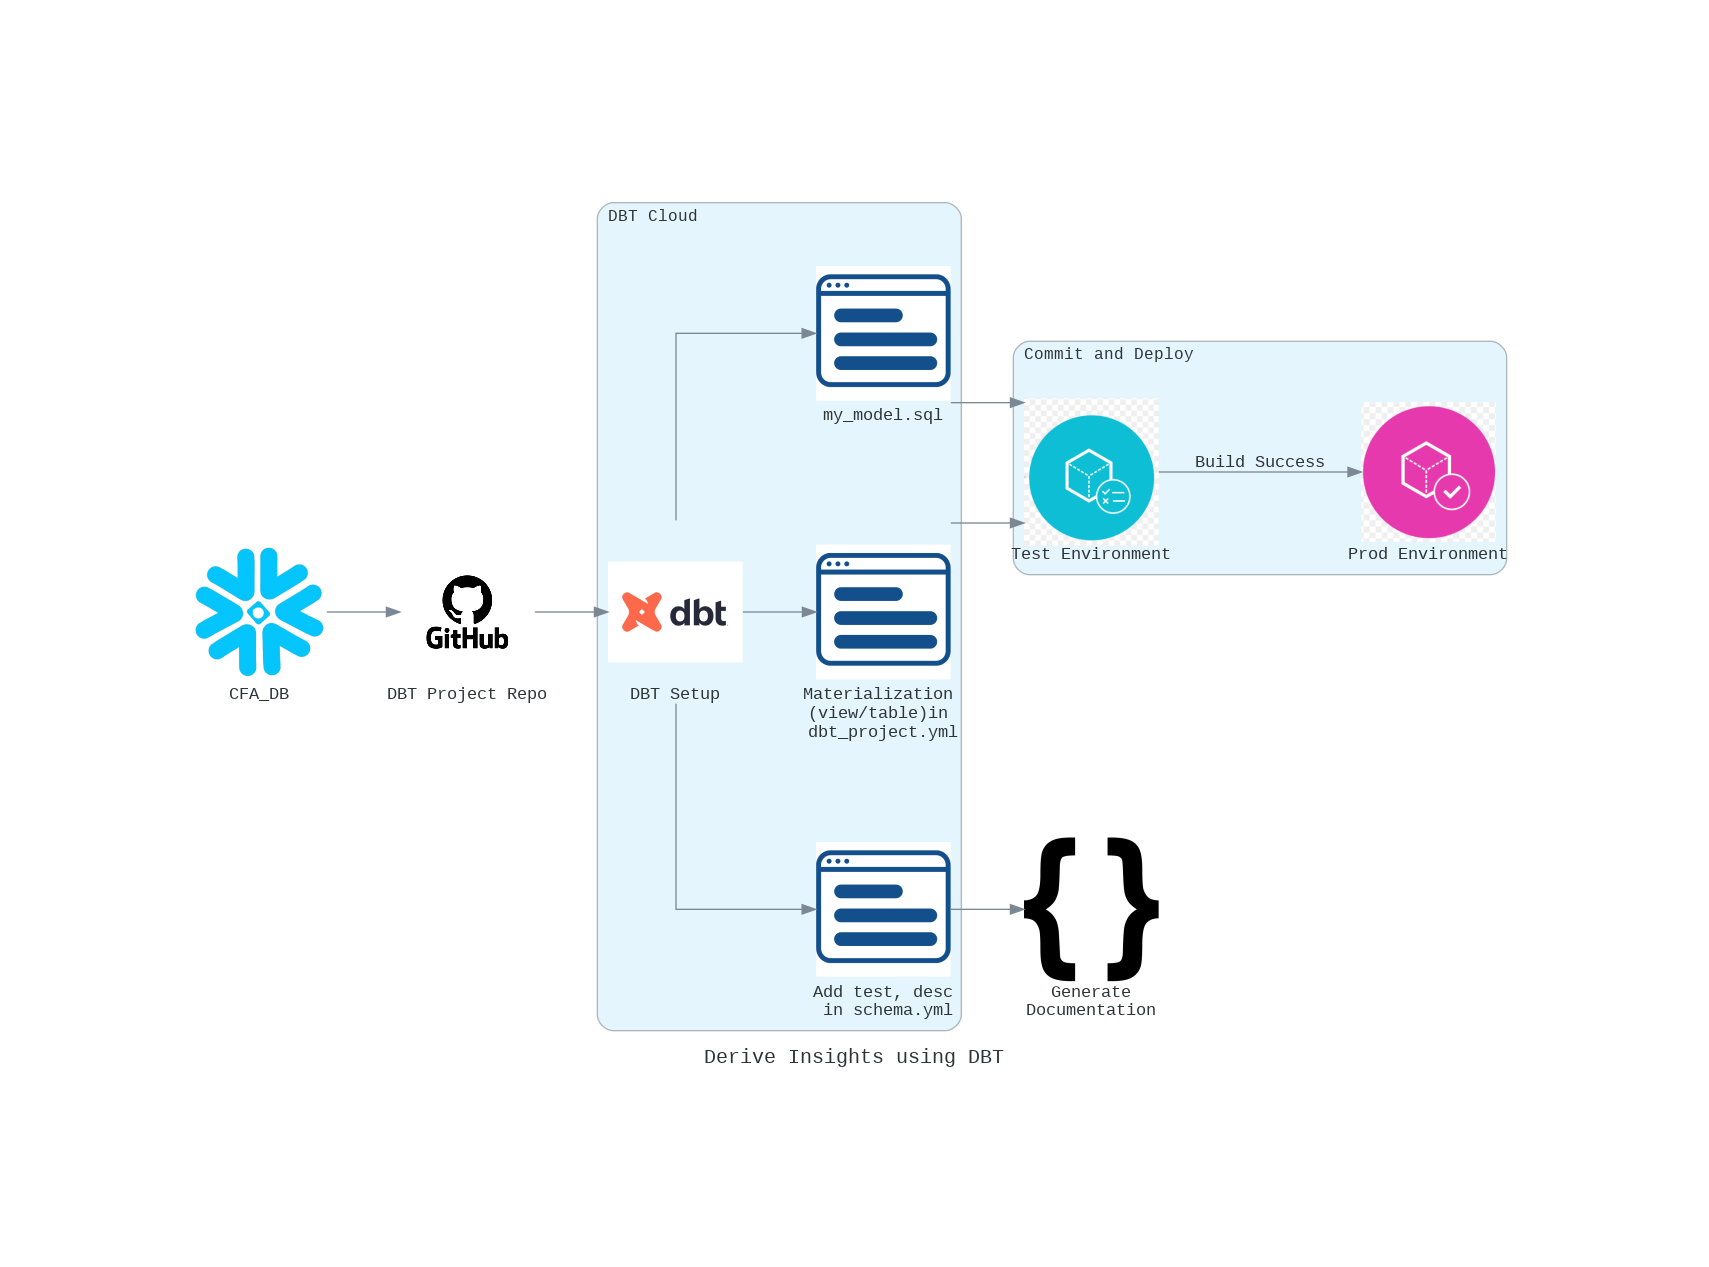

In [ ]:
from diagrams import Cluster, Diagram, Edge
from diagrams.aws.compute import ECS
from diagrams.programming.language import Python
from diagrams.aws.storage import S3
from diagrams.saas.analytics import Snowflake
from diagrams.custom import Custom

with Diagram("Derive Insights using DBT", show=False, direction="LR", filename="architecture") as diag:

    snowflake = Snowflake("CFA_DB")
    github = Custom("DBT Project Repo", "sample_data/github.png")
    # dbt = Custom("DBT Setup", "sample_data/dbt.jpg")
    # myModelSql = Custom("my_model.sql", "sample_data/3.png")
    # materialization =  Custom("Materialization (view/table) in dbt_project.yml", "sample_data/3.png")
    # testAndDescription = Custom("Add test, description in schema.yml", "sample_data/3.png")
    success = Edge(label="Build Success")
    generateDocumentation = Custom("Generate\nDocumentation", "sample_data/brackets-coding-icon.png")
    with Cluster("DBT Cloud"):
        dbt = Custom("DBT Setup", "sample_data/dbt.jpg")
        myModelSql = Custom("my_model.sql", "sample_data/3.png")
        materialization =  Custom("Materialization \n(view/table)in \ndbt_project.yml", "sample_data/3.png")
        testAndDescription = Custom("Add test, desc\n in schema.yml", "sample_data/3.png")
    with Cluster("Commit and Deploy"):
        testingEnv = Custom("Test Environment", "sample_data/test.png")
        prodEnv = Custom("Prod Environment", "sample_data/prod.png")

    snowflake >> github
    github >> dbt
    dbt >> myModelSql
    dbt >> materialization
    dbt >> testAndDescription
    myModelSql >> testingEnv
    materialization >> testingEnv
    testAndDescription >> generateDocumentation
    testingEnv >> success
    success >> prodEnv


diag